In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read the data
df_4 = pd.read_csv("/content/ETTm2.csv")

# print the first five columns
df_4.head()

# print the data dimension
df_4.shape

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001


(69680, 8)

In [3]:
# print some info about the data
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69680 entries, 0 to 69679
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    69680 non-null  object 
 1   HUFL    69680 non-null  float64
 2   HULL    69680 non-null  float64
 3   MUFL    69680 non-null  float64
 4   MULL    69680 non-null  float64
 5   LUFL    69680 non-null  float64
 6   LULL    69680 non-null  float64
 7   OT      69680 non-null  float64
dtypes: float64(7), object(1)
memory usage: 4.3+ MB


In [4]:
# print som statistical information about the data
df_4.describe()

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
count,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000,69680.000000
mean,37.219411,8.554209,43.861438,8.340187,-3.430701,-2.084888,26.609799
std,10.243442,6.031270,13.061909,4.369039,6.154438,6.013584,11.886536
min,0.000000,-29.319000,10.427000,-6.648000,-14.617000,-31.462000,-2.646500
25%,30.156000,4.523000,37.421001,5.656000,-9.286000,-2.505000,16.469500
50%,37.277000,9.131000,41.415001,9.328000,-3.774000,-1.226000,26.577000
75%,44.146000,13.235000,46.186001,11.285000,2.527000,0.000000,35.585999
max,107.892998,36.438999,93.230003,29.808001,17.218000,3.731000,58.876999


In [5]:
# set date column as an index
df_4["date"] = pd.to_datetime(df_4["date"])
df_4.set_index("date", inplace= True)

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'Oil Temperature')

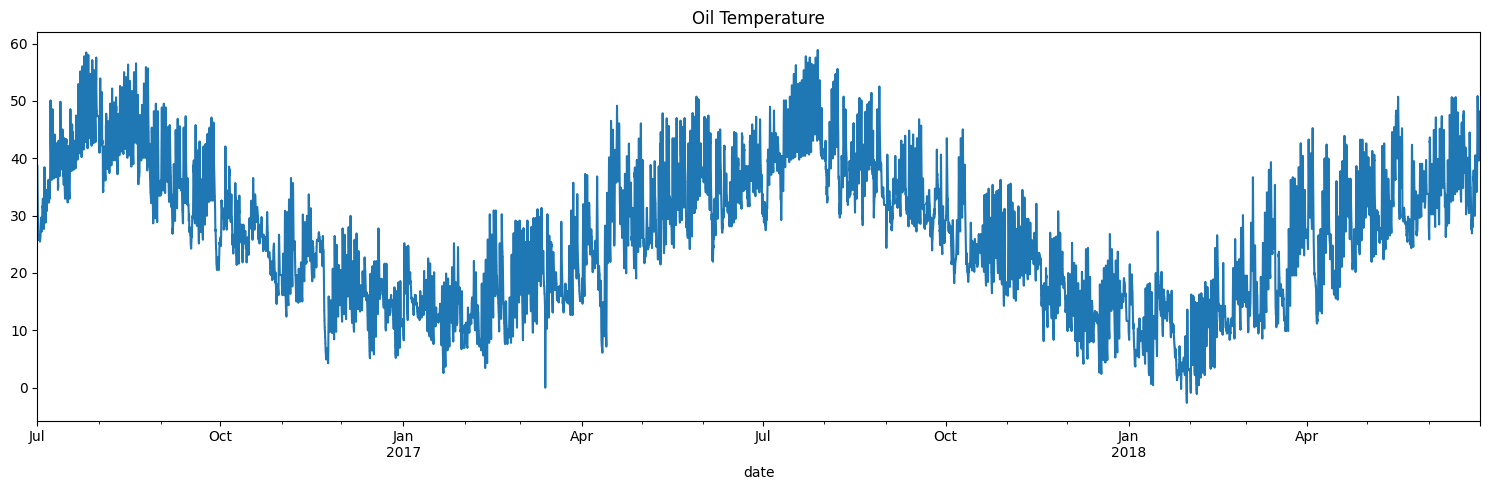

In [6]:
# display oil temperature through the time
plt.figure(figsize=(15, 5))
df_4['OT'].plot()
plt.title("Oil Temperature")
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HUFL')

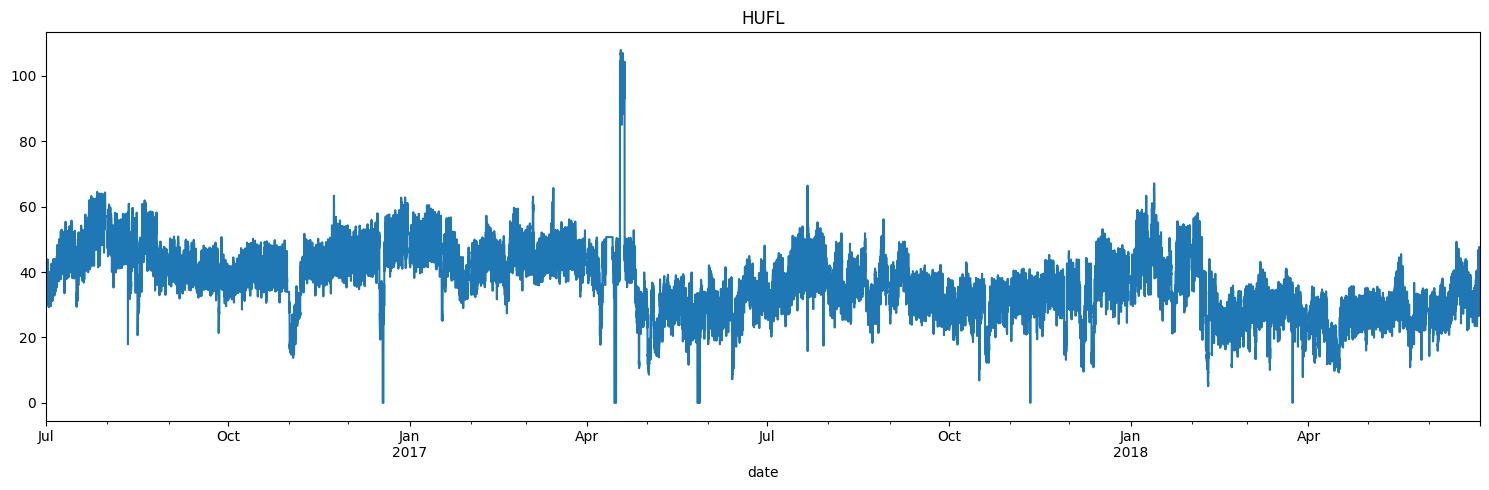

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'HULL')

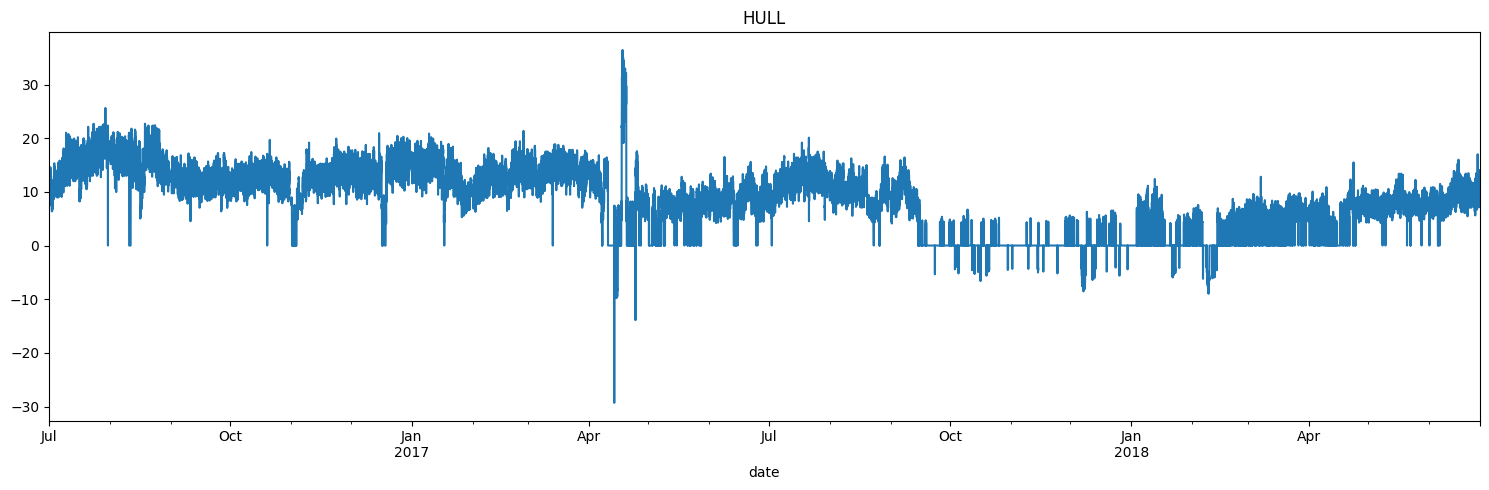

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MUFL')

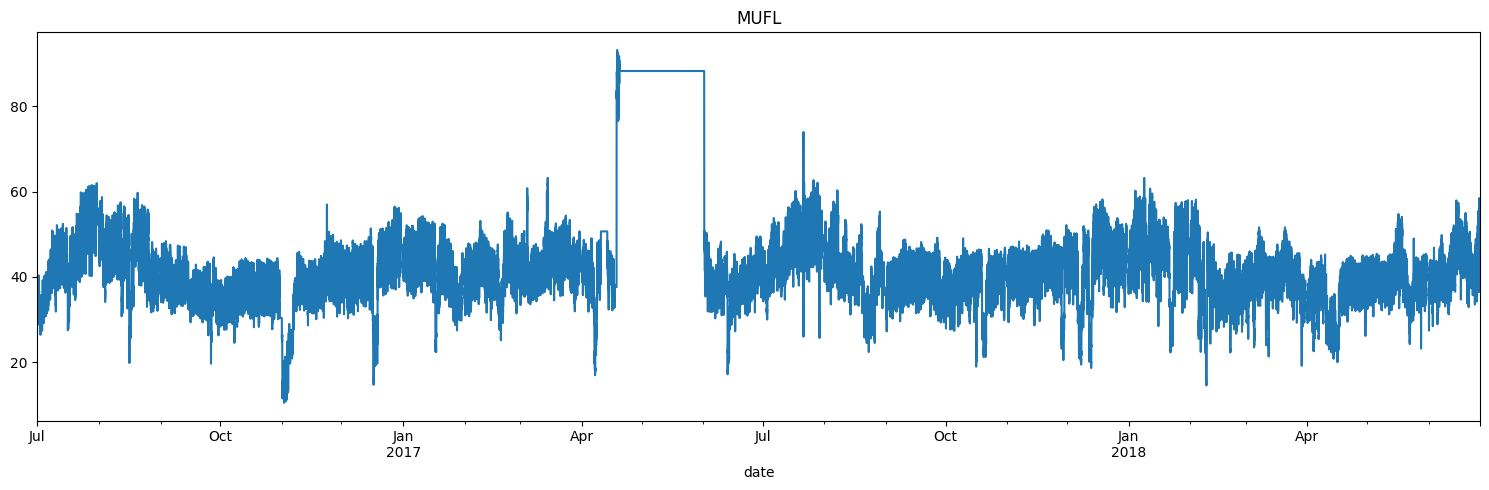

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'MULL')

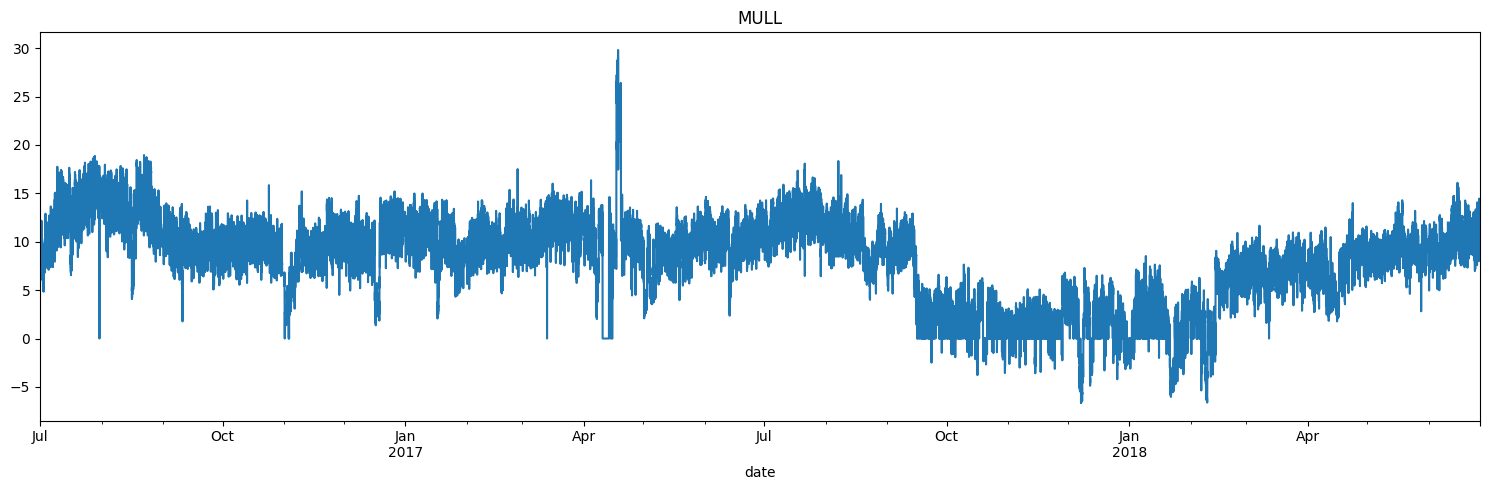

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LUFL')

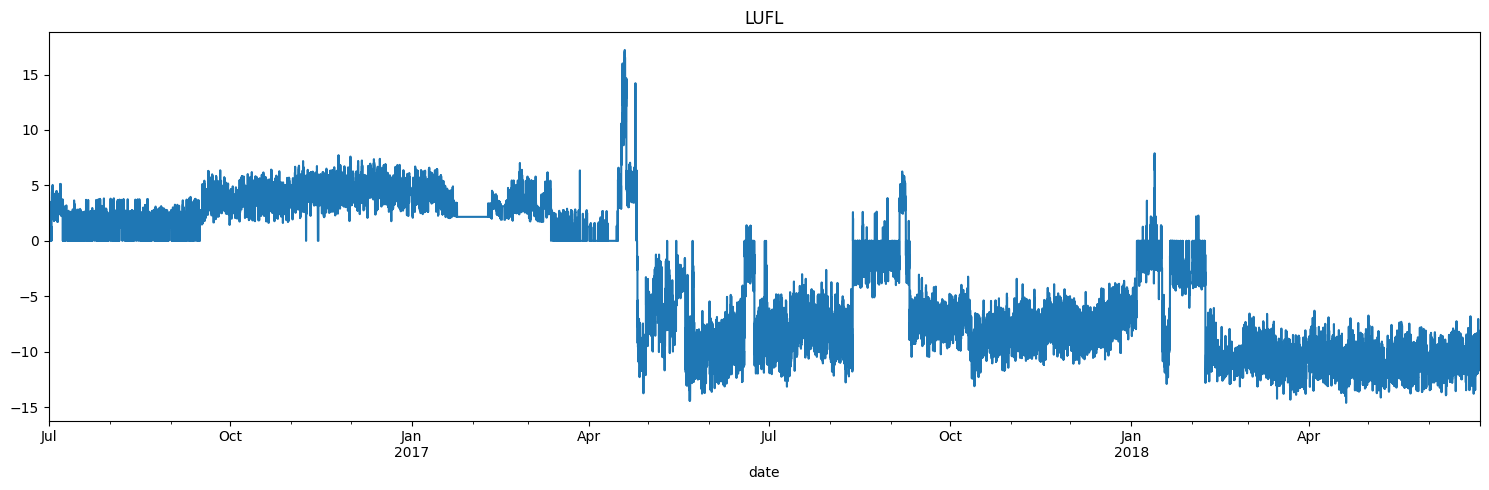

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='date'>

Text(0.5, 1.0, 'LULL')

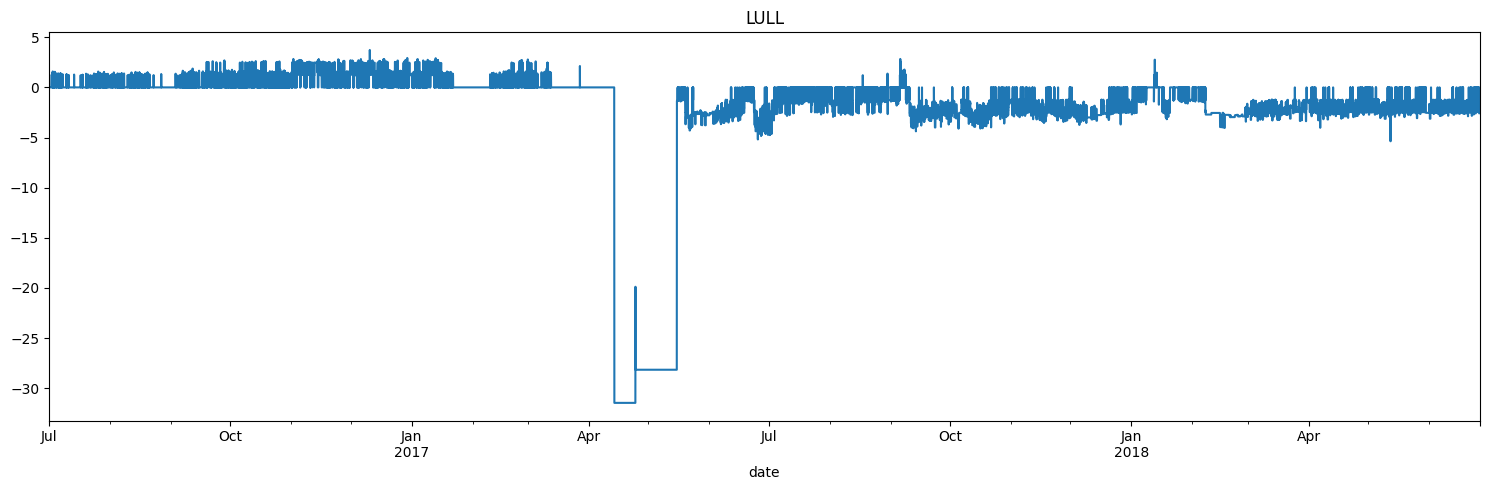

In [7]:
# display the other features through the time

columns = ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL']

for col in columns:
    plt.figure(figsize=(15, 5))
    df_4[col].plot()
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [8]:
# choose all features because of multi-variance

n_cols = 7
cols = list(df_4.loc[:,:])
dataset = df_4[cols]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(69680, 7)

In [9]:
# perform minmaxscaler on the data
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [10]:
# split the data and specify the training data
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

train_data = scaled_data[0:train_size, :]

train_data.shape

(55744, 7)

In [11]:
# Creating a Training set with 336 time-steps
x_train = []
y_train = []
time_steps = 336
n_cols = 7

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [12]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

# print dimensions for x-train and y-train
x_train.shape , y_train.shape

((69344, 336, 7), (69344, 7))

In [13]:
# bulid the model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_cols)
])

# compile the model
model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mse")

# train the model
history = model.fit(x_train, y_train, epochs= 100,validation_split=.2, batch_size= 32)

Epoch 1/100
1734/1734 [==============================] - 89s 45ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 7.3402e-04 - val_mse: 7.3402e-04
Epoch 2/100
1734/1734 [==============================] - 81s 47ms/step - loss: 6.5691e-04 - mse: 6.5691e-04 - val_loss: 8.5636e-04 - val_mse: 8.5636e-04
Epoch 3/100
1734/1734 [==============================] - 77s 45ms/step - loss: 5.3752e-04 - mse: 5.3752e-04 - val_loss: 3.9879e-04 - val_mse: 3.9879e-04
Epoch 4/100
1734/1734 [==============================] - 80s 46ms/step - loss: 4.8216e-04 - mse: 4.8216e-04 - val_loss: 6.4951e-04 - val_mse: 6.4951e-04
Epoch 5/100
1734/1734 [==============================] - 77s 45ms/step - loss: 4.5080e-04 - mse: 4.5080e-04 - val_loss: 3.9705e-04 - val_mse: 3.9705e-04
Epoch 6/100
1734/1734 [==============================] - 77s 45ms/step - loss: 4.2762e-04 - mse: 4.2762e-04 - val_loss: 3.8200e-04 - val_mse: 3.8200e-04
Epoch 7/100
1734/1734 [==============================] - 77s 45ms/step - loss: 4.1238e-04 

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Losses')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'loss')

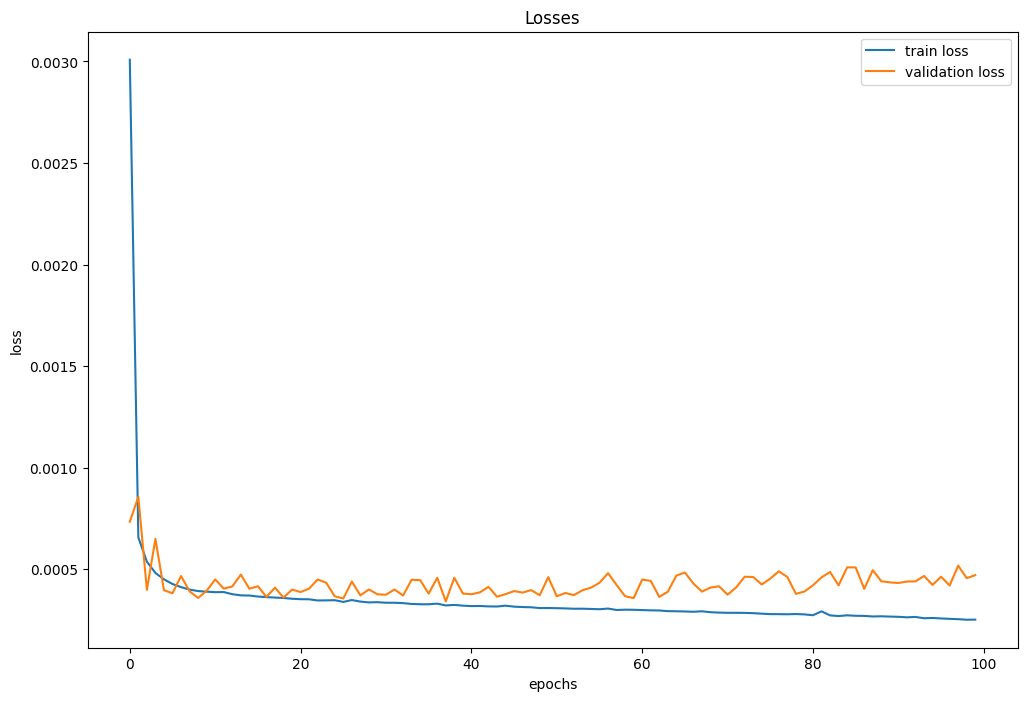

In [14]:
# plot the loss function for training and validation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(['train loss','validation loss'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# prediction_length_336

In [15]:
# Creating a testing set with 336 time-steps
time_steps = 336
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [16]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

436/436 [==============================] - 8s 17ms/step


(13936, 7)

In [17]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [18]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [19]:
# put predictions and actuals in a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,48.118214,45.235001
1,5.428883,4.188000
2,51.976051,49.269001
3,4.832102,3.806000
4,-3.858394,-3.987000
...,...,...
97547,53.173622,54.737000
97548,12.600001,12.679000
97549,-10.220745,-11.536000
97550,-1.154270,-1.418000


<Figure size 1600x600 with 0 Axes>

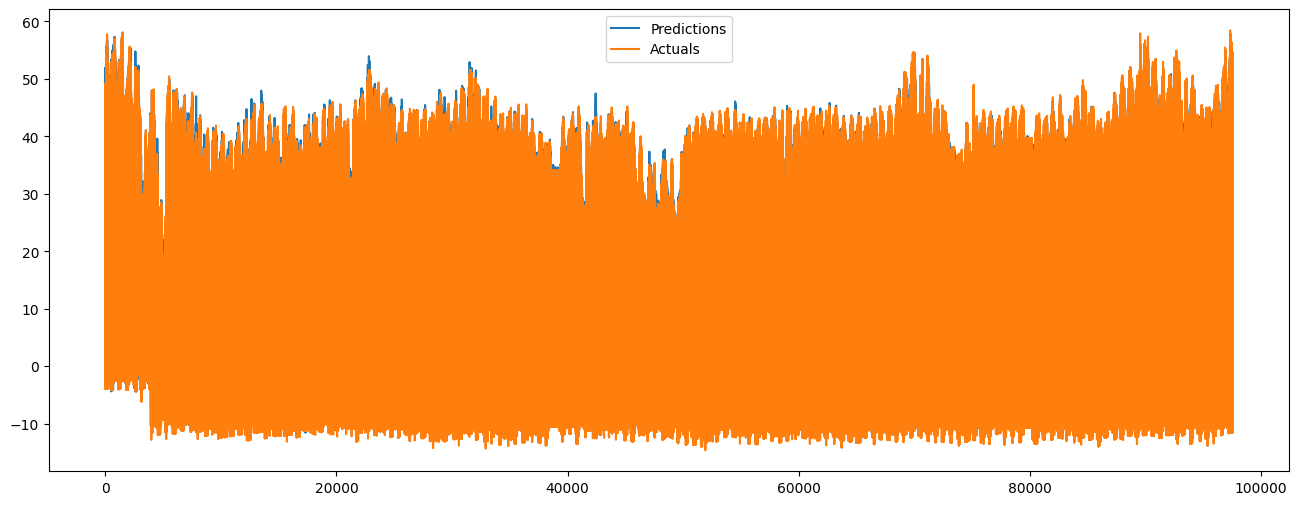

In [20]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_96

In [21]:
# Creating a testing set with 96 time-steps
time_steps = 96
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [22]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

436/436 [==============================] - 4s 7ms/step


(13936, 7)

In [23]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [24]:
# inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [25]:
# put predictions and actuals on a single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,48.313469,45.235001
1,5.546366,4.188000
2,52.218155,49.269001
3,4.916515,3.806000
4,-3.871736,-3.987000
...,...,...
97547,53.144947,54.737000
97548,12.558001,12.679000
97549,-10.224338,-11.536000
97550,-1.118830,-1.418000


<Figure size 1600x600 with 0 Axes>

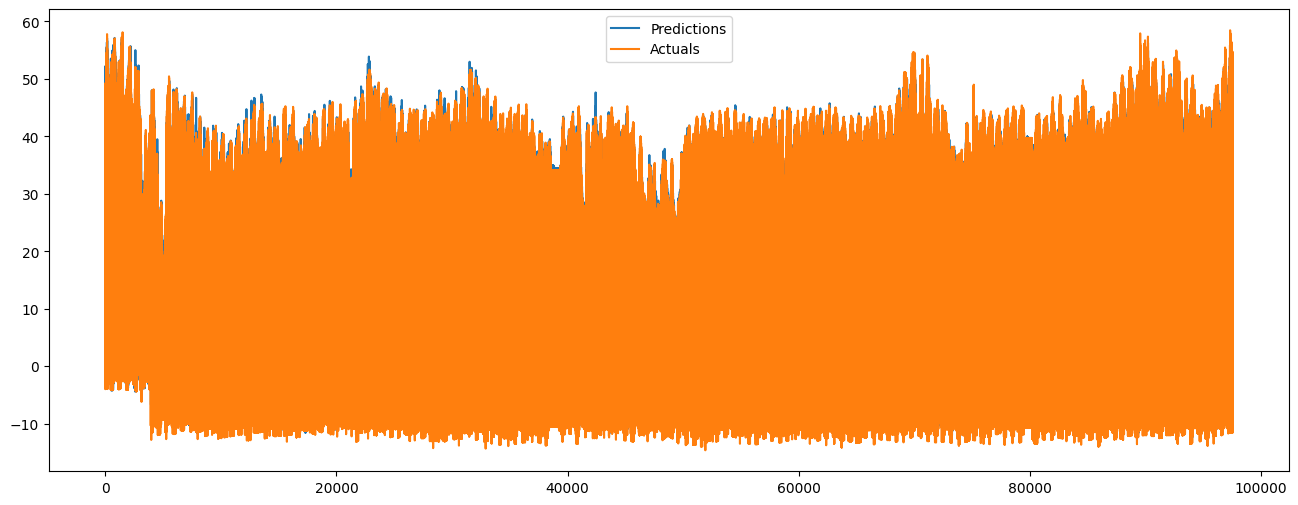

In [26]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

# prediction_length_192

In [27]:
# Creating a testing set with 192 time-steps
time_steps = 192
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [28]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

436/436 [==============================] - 5s 11ms/step


(13936, 7)

In [29]:
# inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [30]:
# nverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [31]:
# put predictions and actuals at one dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,48.127544,45.235001
1,5.438729,4.188000
2,51.989178,49.269001
3,4.838866,3.806000
4,-3.860614,-3.987000
...,...,...
97547,53.186966,54.737000
97548,12.603202,12.679000
97549,-10.223348,-11.536000
97550,-1.155321,-1.418000


<Figure size 1600x600 with 0 Axes>

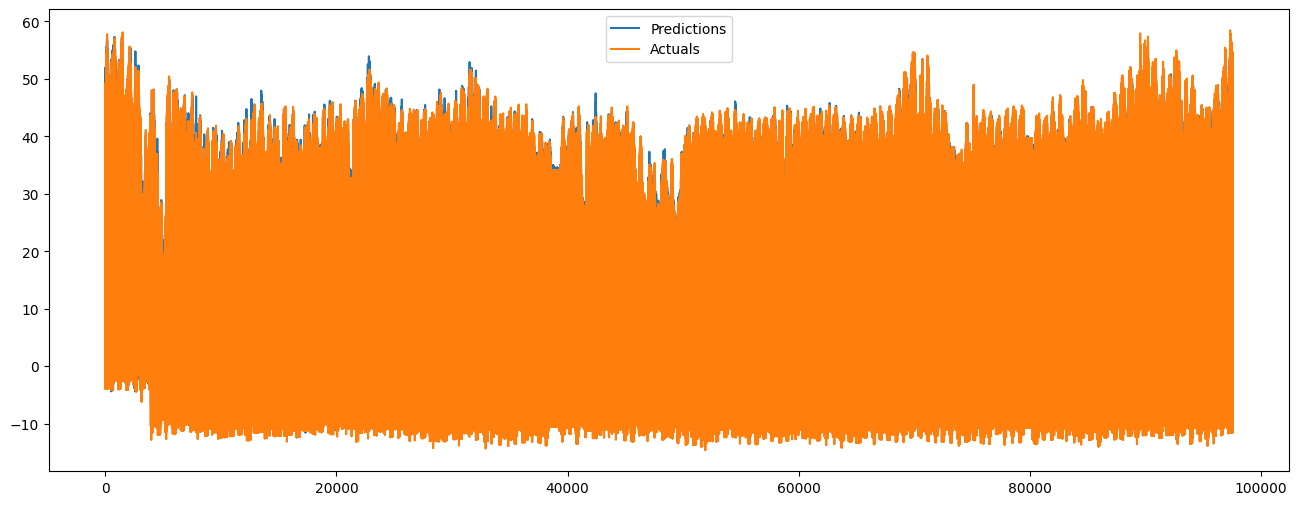

In [32]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

#prediction_length_720

In [33]:
# Creating a testing set with 720 time-steps
time_steps = 720
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 7

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [34]:
# Get Prediction
predictions = model.predict(x_test)
predictions.shape

436/436 [==============================] - 14s 32ms/step


(13936, 7)

In [35]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(13936, 7)

In [36]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [37]:
# put predictions and actuals at single dataframe
preds_df = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_df

,Predictions,Actuals
0,48.118343,45.235001
1,5.429001,4.188000
2,51.976227,49.269001
3,4.832184,3.806000
4,-3.858424,-3.987000
...,...,...
97547,53.173836,54.737000
97548,12.600015,12.679000
97549,-10.220826,-11.536000
97550,-1.154276,-1.418000


<Figure size 1600x600 with 0 Axes>

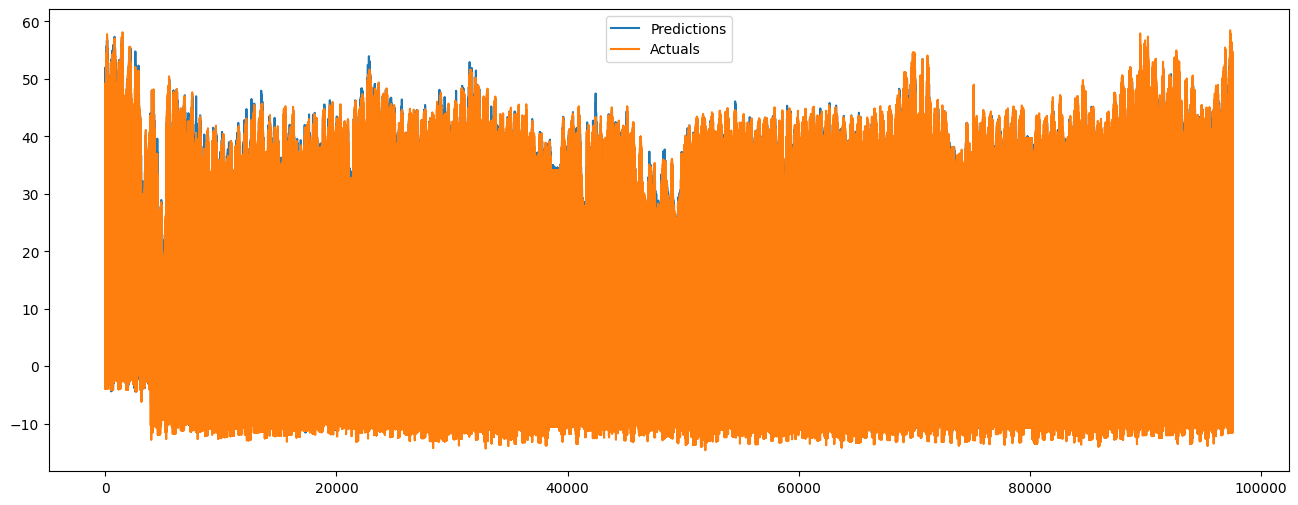

In [38]:
# plot predictions VS actuals
plt.figure(figsize = (16, 6))
plt.plot(preds_df['Predictions'])
plt.plot(preds_df['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()